# Top 10 Economically Dominant Cities
This notebook identifies and visualizes the top 10 economically dominant cities based on their contribution to their country's total GDP.

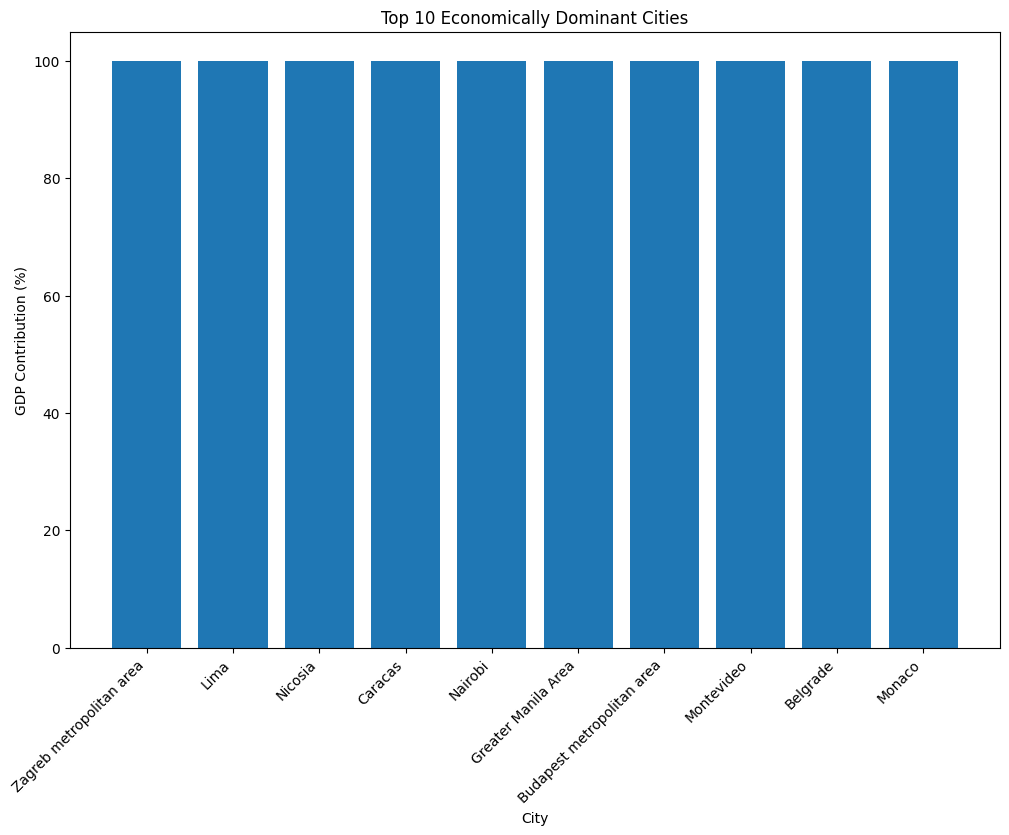

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data/cities_by_gdp.csv'
data = pd.read_csv(file_path)

data['Official est. GDP(billion US$)'] = pd.to_numeric(data['Official est. GDP(billion US$)'].str.replace(',', ''))

country_gdp = data.groupby('Country/Region')['Official est. GDP(billion US$)'].sum().reset_index()
data = data.merge(country_gdp, on='Country/Region', suffixes=('', '_Total'))
data['GDP Contribution (%)'] = (data['Official est. GDP(billion US$)'] / data['Official est. GDP(billion US$)_Total']) * 100

# Plotting the most economically dominant cities
dominant_cities = data.sort_values(by='GDP Contribution (%)', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.bar(dominant_cities['Metropolitian Area/City'], dominant_cities['GDP Contribution (%)'])
plt.xlabel('City')
plt.ylabel('GDP Contribution (%)')
plt.title('Top 10 Economically Dominant Cities')
plt.xticks(rotation=45, ha='right')
plt.show()
